# Supervised Learning Project

# Tratamiento de los datos

Para este proyecto he elegido un dataset de vino, el cual incluye 12 columnas numéricas indicando diferentes características del vino. 

Mi idea es predecir la calidad del vino (columna quality), en base al resto de características. Para ello, voy a ir tratando y transformando los datos para limpiar mi dataset.

Para empezar, importo las librerías que voy a necesitar para este proyecto. Y posteriormente, importo y exploro el dataset con la función head().

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp

In [3]:
wines = pd.read_csv('/home/alejandro/IRONHACK/LABORATORIOS/datamad0119/module-3/supervised-learning-project/your-code/wine.csv')

In [4]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Imprimo las dimensiones del dataset para saber si hay suficientes filas con las que trabajar.

In [5]:
wines.shape

(1599, 12)

Veo que todas las columnas son números, y en la casilla de abajo lo compruebo mirando el tipo de dato de cada columna. Por tanto, no haría falta hacer mayores cambios sobre ninguna columna.

In [6]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Ahora voy a ver si hay alguna columna que pueda eliminar debido a una alta correlación entre alguna de ellas. Pero como podemos ver, no haría falta eliminar ninguna columna por este motivo.

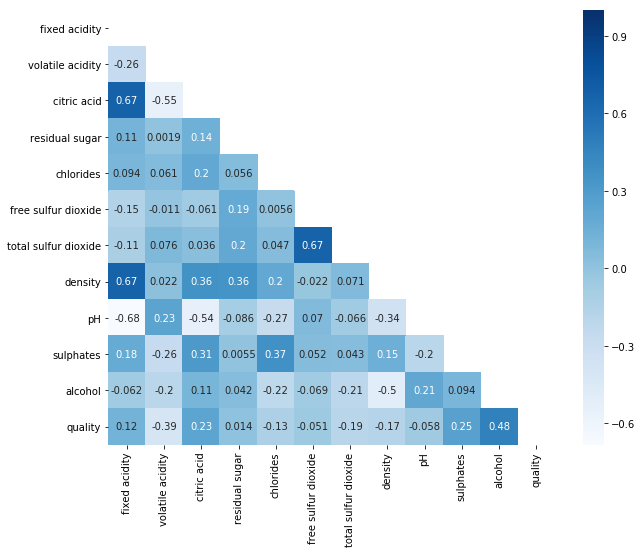

In [7]:
mask = np.zeros_like(wines.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(wines.corr(), mask=mask, annot=True, cmap="Blues")

Continúo viendo siendo hay algún valor nulo en el dataset, para limpiar esas filas, y al no haber ninguno continúo con mi análisis.

In [8]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Analizo cómo es la distribución de la variables que quiero predecir, y veo que la mayoría de los vinos están clasificados como 5 y 6.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

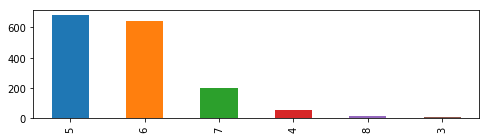

In [9]:
fig, ax = plt.subplots(figsize=(8,2))
ax = wines['quality'].value_counts().plot.bar()

wines['quality'].value_counts()

# Modelo 1: 'OneVsRestClassifier(RandomForestClassifier)'

Empiezo dividendo los datos entre los que voy a estudiar y los que voy a predecir.

In [10]:
y = pd.get_dummies(data=wines.quality)
X = wines.loc[:, wines.columns != 'quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Y establezco el modelo de regresión que voy a utilizar, en este caso, OneVsRestClassifier(RandomForestClassifier).

También hago un cross validation de 10 veces e imprimo las scores, para ver cómo de bueno es mi modelo.

In [11]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.415625   0.321875   0.39375    0.328125   0.39811912]
Accuracy: 0.37 (+/- 0.08)


Como podemos observar, es un modelo poco predictivo, teniendo un accuracy del 0.38.

A continuación le aplico un fit al modelo e imprimo su score.

In [12]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.528125

In [13]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.528125


Como vemos, su capacidad predictiva ha mejorado un poco y ya supera el 50%, aunque sigue siendo baja.

# Accuracy, Precision, Recall y F-score

Continúo calculando la accuracy, precision y recall y fscore, para obtener más métricas con las que valorar el modelo.

In [14]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[2 4 2 3 4 2 3 2 3 2 3 4 3 2 3 5 3 2 2 3 4 1 3 2 1 3 3 3 3 3 2 4 2 3 2 3 1
 4 3 2 3 3 3 4 3 3 2 2 0 2 3 2 2 1 3 3 2 3 2 4 4 3 2 2 3 2 3 1 3 2 2 4 2 2
 3 1 2 3 2 2 2 2 3 2 3 4 2 2 3 4 3 3 2 2 2 3 3 3 3 2 2 2 4 3 2 2 2 2 3 4 3
 3 2 3 4 4 2 3 3 4 4 2 3 3 3 3 2 3 4 3 3 2 2 5 3 2 2 3 3 3 2 4 4 4 3 2 2 4
 2 3 3 3 4 3 3 2 2 2 3 3 2 3 2 2 2 1 2 2 2 4 4 3 3 2 3 2 4 2 4 4 3 2 3 2 2
 2 2 2 2 2 2 2 3 4 3 3 4 2 3 0 2 2 2 4 2 2 2 3 3 5 3 4 2 2 3 3 3 3 2 3 2 3
 4 3 4 2 3 3 3 3 2 2 1 2 2 3 2 2 3 3 2 2 2 0 3 2 4 3 2 2 2 3 3 2 4 2 4 3 2
 4 3 3 2 3 2 4 3 4 2 2 3 4 3 2 3 3 2 3 3 2 3 3 3 3 3 2 2 2 3 3 2 4 3 3 1 2
 2 2 2 2 1 2 2 3 1 3 4 2 2 2 2 3 3 2 4 3 2 3 2 2]


Como medidas alternativas, también voy a medid el accuracy score y el balanced accuracy score.

El primero simplemente mide el ratio de predicciones correctas sobre las incorrectas. Este ratio es fácil de entender, aunque para datasets que tienen una gran cantidad de valores concentrados en una determinada clase puedes ser engañoso, porque no predeciría correctamente para las clases menos comunes, como es nuestro caso, en el que las mayoría de los vinos tienen una calidad de 5 o 6.

In [15]:
accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.54375

Es por ello que calculo el segundo ratio antes mencionado, el cual combate este tipo de sesgos, el cual le da diferentes pesos a cada clase. Y como podemos ver el ratio decrece cayendo casi a la mitad, lo que viene a poner de relieve algo que ya nos imaginábamos, que es la poca capacidad predictiva de nuestro modelo.

In [16]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.24959565969435973

In [17]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = [3, 4, 5, 6, 7, 8]
precision_recall.index.name = 'quality'
precision_recall

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,f1_score
quality,,,
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.733813,0.761194,0.747253
6,0.693182,0.491935,0.575472
7,0.578947,0.244444,0.343750
8,0.000000,0.000000,0.000000


Como podemos observar, las 3 métricas son más altas para calidades de 5, 6 y 7. Para el resto, las predicciones son muy malas.

# Confusion matrix

A continuación voy a calcular la confusion matrix para ver cómo se han distribuido mis predicciones.

Confusion matrix, without normalization
[[  0   0   3   0   0   0]
 [  3   0   7   1   0   0]
 [ 17   0 102  13   2   0]
 [ 34   0  24  61   5   0]
 [ 19   0   3  12  11   0]
 [  1   0   0   1   1   0]]


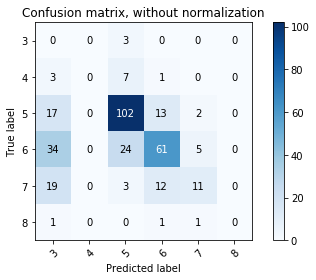

In [18]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

Como se puede ver, las predicciones para calidades de 5 y 6 aciertan con relativa frecuencia, pero para el resto las predicciones han sido bastante malas. Aún así, para la calidad de 6, ha fallado bastantes predicciones.

# ROC Curve

Para poder calcualr la ROC Curve para una variable multiclass, primero tenemos que binarizar la variable y.

In [21]:
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

Le hacemos aprender al modelo a predecir una clase contra otra.

In [23]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

Y computanos la ROC Curve y la ROC Area para cada clase.

In [24]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

Y ahora computamos la micro-average ROC curve y la ROC area.

In [25]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

Ahora continuamos computando la macro-average ROC Curve y la ROC Area.

Primeros agregamos todos los falsos positivos.

In [26]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

Entonces interpolamos todas las ROC Curves en estos puntos.

In [27]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

Finalmente hacemos la media de todo y computamos la AUC.

In [28]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

Y para terminar ploteamos todas las ROC Curves.

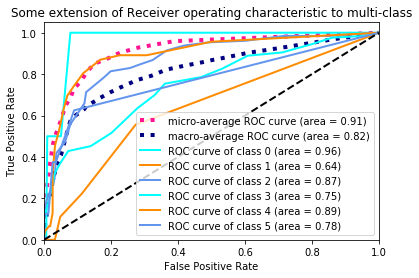

In [29]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Una vez he terminado con el primer modelo, repito los mismos cálculos para el Modelo 2 y el Modelo 3.

# Modelo 2: 'OneVsRestClassifier(linear_model.LinearRegression)'

In [30]:
y = pd.get_dummies(data=wines.quality)
X = wines.loc[:, wines.columns != 'quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [31]:
clf = OneVsRestClassifier(linear_model.LinearRegression())
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.49375   0.43125   0.2875    0.38125   0.55625   0.3625    0.3125
 0.2875    0.45      0.3081761]
Accuracy: 0.39 (+/- 0.18)


In [32]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.378125

In [33]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.378125


# Accuracy, Precision, Recall y F-score

In [34]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[3 3 2 3 4 4 3 3 2 3 4 3 3 2 4 4 2 4 3 3 2 2 3 3 2 3 4 2 4 2 4 2 2 4 2 3 4
 3 2 4 3 2 3 3 2 2 2 3 2 3 3 2 2 3 3 2 2 3 2 3 1 2 4 3 3 2 2 2 3 1 2 2 2 3
 3 3 3 0 4 2 4 4 2 2 3 2 2 3 3 2 4 2 2 2 4 3 2 2 1 3 2 3 2 2 3 3 1 2 3 4 2
 2 4 2 4 5 4 2 3 3 2 2 3 3 3 3 1 4 4 2 3 4 3 3 2 3 2 3 2 3 2 2 3 2 5 2 4 3
 3 3 2 3 3 3 2 2 2 3 3 3 2 4 2 2 2 2 3 2 2 3 2 2 3 2 2 3 2 3 2 3 3 3 2 2 3
 2 2 3 3 3 2 3 2 2 2 3 2 3 3 3 3 2 2 4 2 3 3 2 3 5 3 3 3 2 2 3 3 2 3 3 2 2
 3 2 1 2 3 3 4 2 2 3 3 3 3 2 2 3 3 3 3 3 2 3 3 2 3 2 2 3 2 2 2 2 3 3 3 2 2
 3 3 2 3 4 2 2 2 3 2 3 3 2 2 2 4 3 3 3 2 3 2 3 2 3 2 2 2 3 0 3 4 2 2 2 2 2
 2 2 4 2 3 2 2 3 3 2 2 3 3 2 3 4 4 5 1 2 3 2 2 3]


In [35]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.378125

In [36]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.14585137085137087

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = [3, 4, 5, 6, 7, 8]
precision_recall.index.name = 'quality'
precision_recall

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,f1_score
quality,,,
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.657534,0.685714,0.671329
6,0.480769,0.189394,0.271739
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000


# Confusion matrix

Confusion matrix, without normalization
[[ 0  0  2  0  0  0]
 [ 2  0  5  0  0  0]
 [39  0 96  5  0  0]
 [65  0 42 25  0  0]
 [15  0  1 19  0  0]
 [ 1  0  0  3  0  0]]


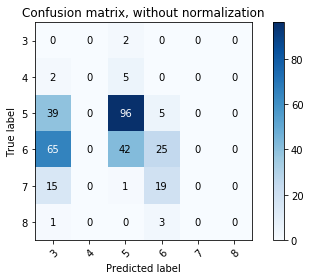

In [38]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

# ROC Curve

In [39]:
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [42]:
classifier = OneVsRestClassifier(linear_model.LinearRegression())
y_score = classifier.fit(X_train, y_train).predict(X_test)

In [43]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [44]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [45]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [46]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [47]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

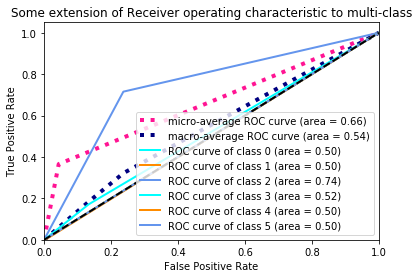

In [48]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Modelo 3: 'OneVsRestClassifier(svm.SVC)'

In [49]:
y = pd.get_dummies(data=wines.quality)
X = wines.loc[:, wines.columns != 'quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [50]:
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
#scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.49375   0.43125   0.2875    0.38125   0.55625   0.3625    0.3125
 0.2875    0.45      0.3081761]
Accuracy: 0.39 (+/- 0.18)


In [51]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.28125

In [52]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.28125


# Accuracy, Precision, Recall y F-score

In [53]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[4 3 2 2 3 1 2 1 2 3 3 4 4 3 3 3 4 3 4 3 3 2 2 2 4 2 3 3 2 2 2 3 2 3 3 3 4
 1 2 2 2 2 3 3 3 3 1 3 3 2 4 2 3 2 3 3 3 2 2 2 3 2 3 3 4 2 3 3 4 2 3 3 3 2
 2 3 2 2 3 3 2 2 3 3 3 2 2 2 2 3 2 2 4 2 3 2 2 2 2 4 2 1 4 2 2 3 4 3 5 1 4
 3 2 3 3 2 2 2 2 4 2 3 2 3 2 3 3 4 3 2 2 2 3 3 3 2 4 3 2 2 3 3 3 3 2 2 4 2
 2 3 3 2 2 3 4 2 3 2 1 3 3 4 3 3 3 2 3 3 2 3 2 2 3 2 4 3 3 2 2 2 3 2 3 2 2
 3 2 3 2 3 1 2 4 3 2 2 2 2 3 1 4 3 3 2 4 3 3 3 3 3 3 3 2 2 3 2 3 2 2 3 4 3
 1 2 5 3 3 2 4 4 2 2 2 2 4 3 3 3 2 4 3 4 2 4 4 2 2 3 3 2 2 4 3 2 3 2 3 3 1
 3 3 2 2 3 4 3 3 2 2 4 3 4 3 2 3 2 3 4 3 2 2 3 2 3 2 3 2 2 3 3 4 3 2 4 2 4
 2 2 2 3 4 2 3 2 3 3 3 2 2 3 4 1 4 2 2 4 3 3 2 2]


In [54]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.28125

In [55]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.13846153846153847

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = [3, 4, 5, 6, 7, 8]
precision_recall.index.name = 'quality'
precision_recall

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, war

,precision,recall,f1_score
quality,,,
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
5,0.681818,0.692308,0.687023
6,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000


# Confusion matrix

Confusion matrix, without normalization
[[ 0  0  0  0  0  0]
 [ 5  0  7  0  0  0]
 [40  0 90  0  0  0]
 [97  0 34  0  0  0]
 [44  0  1  0  0  0]
 [ 2  0  0  0  0  0]]


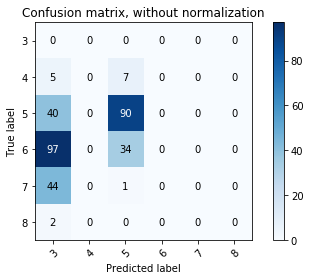

In [57]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

# ROC Curve

In [58]:
y = label_binarize(y, classes=[3, 4, 5, 6, 7, 8])
n_classes = y.shape[1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [60]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [61]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [62]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [63]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [64]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [65]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

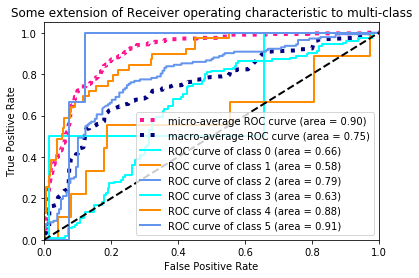

In [66]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Cambio de variable a predecir

Dado que las predicciones anteriores han sido bastnate malas, voy a intentar reducir el número de variables a predecir, creando bins y reduciéndolas así a 3 calidades: 'low', 'medium' y 'high'.

In [67]:
wines_aux = wines.copy()

In [68]:
quality_labels = ['Low', 'Medium', 'High']
cutoffs = [0,4,6,10]
quality_bins = pd.cut(wines_aux.quality,cutoffs, labels=quality_labels)
wines_aux['quality_bins'] = quality_bins
wines_aux.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_bins
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Medium


In [69]:
wines_aux.drop(['quality'], axis=1, inplace=True)
wines_aux.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bins
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [70]:
y = pd.get_dummies(data=wines_aux.quality_bins)
X = wines_aux.loc[:, wines_aux.columns != 'quality_bins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [71]:
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.88125   0.8625    0.79375   0.76875   0.91875   0.68125   0.70625
 0.76875   0.875     0.8490566]
Accuracy: 0.81 (+/- 0.15)


In [72]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.85625

In [73]:
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85625


# Accuracy, Precision, Recall y F-score

In [74]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[2 1 1 1 1 1 1 0 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 2 1 1 1 0 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2
 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 2 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 2 1 1 1
 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 0 1
 1 1 2 1 1 2 0 1 1 1 1 1 2 1 0 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [75]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.859375

In [76]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.5162170318063853

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Low', 'Medium', 'High']
precision_recall.index.name = 'quality'
precision_recall

,precision,recall,f1_score
quality,,,
Low,0.090909,0.066667,0.076923
Medium,0.884211,0.958175,0.919708
High,0.916667,0.523810,0.666667


# Confusion matrix

Confusion matrix, without normalization
[[  1  14   0]
 [  9 252   2]
 [  1  19  22]]


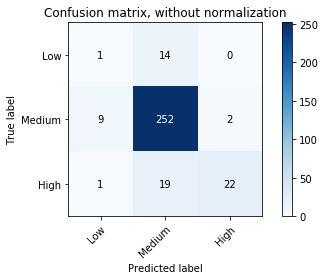

In [78]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

# ROC Curve #1: 'OneVsRestClassifier(RandomForestClassifier)'

In [79]:
y = label_binarize(y, classes=['Low', 'Medium', 'High'])
n_classes = y.shape[1]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [81]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=20))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [82]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [83]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [84]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [85]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [86]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

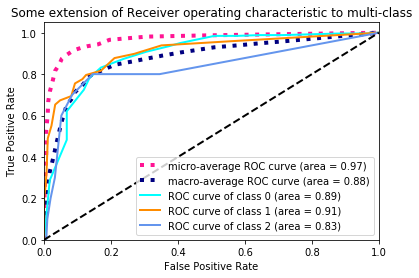

In [87]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# ROC Curve #2: 'OneVsRestClassifier(svm.SVC)'

In [90]:
y = pd.get_dummies(data=wines_aux.quality_bins)
X = wines_aux.loc[:, wines_aux.columns != 'quality_bins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [91]:
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
#scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.88125   0.8625    0.79375   0.76875   0.91875   0.68125   0.70625
 0.76875   0.875     0.8490566]
Accuracy: 0.81 (+/- 0.15)


In [92]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.809375

In [93]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf.predict(X_test).argmax(axis=1)
print(actual_values)

cm = confusion_matrix(actual_values, predictions)

[0 1 2 1 1 2 2 1 0 1 1 1 2 1 2 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1
 2 1 1 1 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 2 1 2 2 1 2 1 1 1
 2 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 2 2 1 1 1 1 1 1 1
 1 1 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1
 2 1 1 2 1 0 2 1 2 1 1 1 1 1 1 2 1 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 0]


In [94]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.809375

In [95]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.3333333333333333

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Low', 'Medium', 'High']
precision_recall.index.name = 'quality'
precision_recall

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,precision,recall,f1_score
quality,,,
Low,0.000000,0.0,0.000000
Medium,0.809375,1.0,0.894646
High,0.000000,0.0,0.000000


Confusion matrix, without normalization
[[  0  12   0]
 [  0 259   0]
 [  0  49   0]]


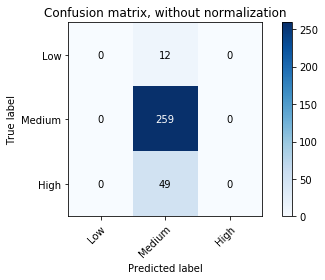

In [97]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [98]:
y = label_binarize(y, classes=['Low', 'Medium', 'High'])
n_classes = y.shape[1]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [100]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [101]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [102]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [103]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [104]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [105]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

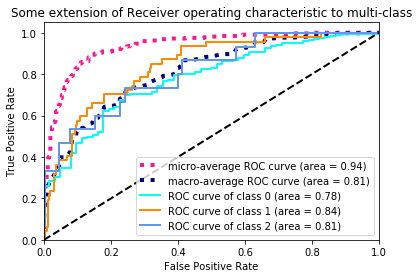

In [106]:
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Conclusiones

Respecto a las 3 primeras regresiones, creo que el principal factor a la hora de determinar el poder de predicción de los modelos ha sido que la mayoría de las categorías sen concentraban en los valores 5 y 6, de ahí que ningún modelo haya tenido una gran capacidad de predicción, sobre todo para valores por debajo del 5.

Una vez dicho esto, como podemos observar en base a los resultados, el mejor modelo de los tres ha sido el primero, algo que también se puede comprobar viendo la ROC Curve.

Respecto al último apartado en el que he creado bins para reducir el número de clases a predecir, he podido ver que su capacidad predictiva ha aumentado mucho, hasta tener un score por encima del 0.8, lo cual es algo que según mi criterio era de esperar.

De todas formas, seguimos teniendo el mismo problema que antes, la capacidad predictiva para valores que no son 5 o 6 es muy baja, sobre todo para los que están por debajo de 5.

Las ROC Curve corroboran que es mejor modelo el primero, tal y como pasaba en la primera parte del laboratorio.

Como conclusión final, destacar que no creo que las variables o features en las que se basa este modelo tengo mucha relación con la calidad final del vino, y seguramente sea mejor buscar otra variables con más relevancia, como el área de cultivo de la uva, la meteorología que hubo dicho año, o la variedad de la uva utilizada.

Es por ello que no creo que haya algún modelo que sea capaz de conseguir una capacidad predictiva muy diferente a la que hemos conseguido con los modelos utilizados, sobre todo con el primero.